In [1]:
print("Hello, Jupyter in VS Code!")


Hello, Jupyter in VS Code!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv("titanic.csv")
print("✅ File loaded successfully")
print(df.shape)
display(df.head())

✅ File loaded successfully
(10, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Braund,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Cumings,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Futrelle,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Allen,male,35.0,0,0,373450,8.0500,S


In [5]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  10 non-null     int64  
 1   Survived     10 non-null     int64  
 2   Pclass       10 non-null     int64  
 3   Name         10 non-null     object 
 4   Sex          10 non-null     object 
 5   Age          9 non-null      float64
 6   SibSp        10 non-null     int64  
 7   Parch        10 non-null     int64  
 8   Ticket       10 non-null     object 
 9   Fare         10 non-null     float64
 10  Embarked     10 non-null     object 
dtypes: float64(2), int64(5), object(4)
memory usage: 1012.0+ bytes
None


In [6]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
if "Age" in df.columns:
    df["Age"] = df["Age"].fillna(df["Age"].median())

In [11]:
if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [12]:
df = df.drop(columns=["Cabin"], errors="ignore")

In [13]:
if "Sex" in df.columns:
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [14]:
if "Embarked" in df.columns:
    df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

In [16]:
features = [col for col in ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_Q", "Embarked_S"] if col in df.columns]

X = df[features]
y = df["Survived"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = model.predict(X_test)

In [20]:
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc:.2f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


✅ Model Accuracy: 0.50

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



c:\Users\COMPUMARTS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\COMPUMARTS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\COMPUMARTS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

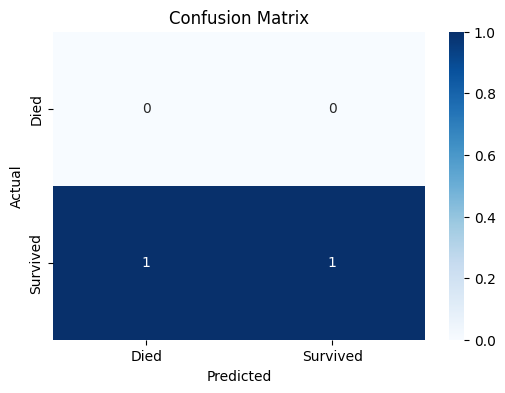

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

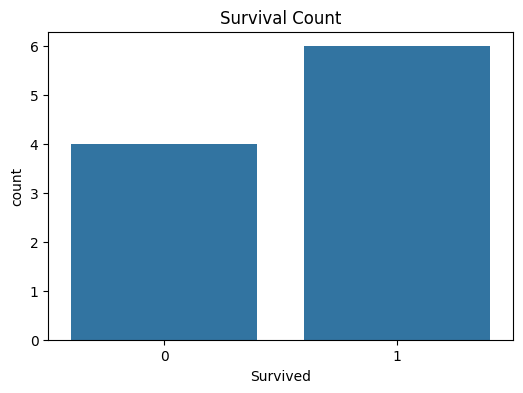

In [22]:
if "Survived" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Survived", data=df)
    plt.title("Survival Count")
    plt.show()

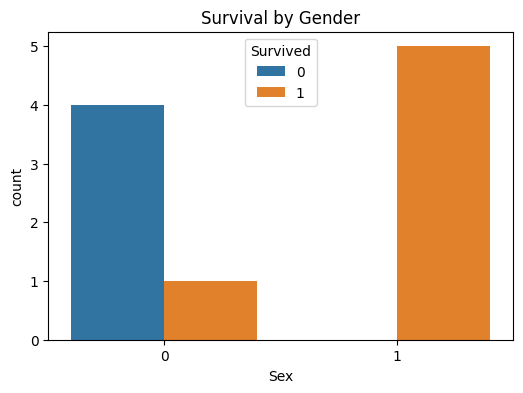

In [23]:
if "Sex" in df.columns and "Survived" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Sex", hue="Survived", data=df)
    plt.title("Survival by Gender")
    plt.show()

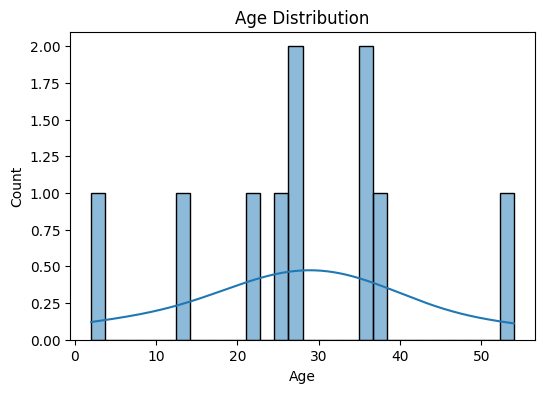

In [24]:
if "Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Age"], bins=30, kde=True)
    plt.title("Age Distribution")
    plt.show()